# Overview of Notebook 4
* Statsmodels
* Preliminaries
* What even is machine learning?
* Machine learning in Python: why scikit-learn?
* Feature extraction
* Feature selection
* Estimation
* Evaluation
* Automation
* A brief look at deep learning

In [7]:
# We'll load scikit-learn modules as we go,
# so we can see what we're using.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [8]:
# You may need to modify the path to the file
# depending on where you put it on your computer.
data = pd.read_csv('preprocessed_data.csv')
data[:5]

,id,name,datetime,monthyear,date of birth,outcome,outcome_subtype,animal,sex_string,age_string,...,sex,sterilized,first_color,mixed_color,merge_key,breed_name,min_height,max_height,min_weight,max_weight
0,A006100,Scamp,2017-12-07 00:00:00,12/07/2017 12:00:00 AM,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,10 years,...,0.0,1.0,Yellow,1,Spinone Italiano,NaN,NaN,NaN,NaN,NaN
1,A047759,Oreo,2014-04-07 15:12:00,04/07/2014 03:12:00 PM,04/02/2004,Transfer,Partner,Dog,Neutered Male,10 years,...,0.0,1.0,Tricolor,0,Dachshund,Dachshund,5.0,11.0,17.0,32.0
2,A134067,Bandit,2013-11-16 11:54:00,11/16/2013 11:54:00 AM,10/16/1997,Return to Owner,NaN,Dog,Neutered Male,16 years,...,0.0,1.0,Brown,1,Shetland Sheepdog,Shetland Sheepdog,13.0,14.0,12.0,24.0
3,A141142,Bettie,2013-11-17 11:40:00,11/17/2013 11:40:00 AM,06/01/1998,Return to Owner,NaN,Dog,Spayed Female,15 years,...,1.0,1.0,Black,1,Labrador Retriever,Labrador Retriever,21.0,24.0,49.0,77.0
4,A163459,Sasha,2014-11-14 19:28:00,11/14/2014 07:28:00 PM,10/19/1999,Return to Owner,NaN,Dog,Intact Female,15 years,...,1.0,0.0,Black,1,Miniature Schnauzer,NaN,NaN,NaN,NaN,NaN


## [Statsmodels](http://statsmodels.sourceforge.net/devel/index.html#)
* Python's answer to base R
* It's not a great answer
* But it's getting there, and things [move quickly](https://github.com/statsmodels/statsmodels/issues)
* For common procedures, functionality is very similar to R

### What's in statsmodels
* Basic tests
* Linear models
* Diagnostics and specification tests
* Power calculations
* Multiple comparisons correction
* Time-series analysis
* Experimental support for many other things (e.g. mixed-effects models)

### Statsmodel examples
* Let's build a model to predict whether an animal is euthanized or not
* We'll use logistic regression using the formula interface
* We'll start by predicting euthanasia from just age, sex, and sterilization

In [9]:
data = pd.read_csv('preprocessed_data.csv')

In [10]:
import statsmodels.formula.api as smf
data['outcome_subtype'] = data['outcome_subtype'].fillna('Unknown')
# Drop missing values from analysis
tmp_data = data[['outcome', 'age', 'sex', 'sterilized']].dropna()
print("Kept {} observations.".format(len(tmp_data)))

# # The dependent variable: whether the animal was euthanized
tmp_data['y'] = (tmp_data['outcome'] == 'Euthanasia').astype(int)

# Specify the model with a formula
model = smf.logit('y ~ age + sex * sterilized', data=tmp_data)

# Fit model and save result
result = model.fit()

Kept 67565 observations.
Optimization terminated successfully.
         Current function value: 0.157950
         Iterations 8


In [11]:
# Print a user-friendly summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                67565
Model:                          Logit   Df Residuals:                    67560
Method:                           MLE   Df Model:                            4
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.1165
Time:                        14:31:27   Log-Likelihood:                -10672.
converged:                       True   LL-Null:                       -12079.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.5099      0.036    -68.968      0.000      -2.581      -2.439
age                0.0146      0.000     37.566      0.000       0.014       0.015
sex               -0.1828      0.051     -3.601      0.000      -0.282      -0.083
sterilized        -1.7178      0.053    -32.216      0.000      -1.822      -1.613
sex:sterilized    -0.1890      0.081     -2.343      0.019      -0.347      -0.031
==================================================================================
"""

### Adding categorical predictors
* Old animals are more likely to be euthanized
* Is this explained by differences in species, breed, etc.?
* We can add categorical predictors either by:
    * Constructing the dummy variables ourselves (e.g., with pandas)
    * Using the patsy module to do it in an R-like way

## Reload the data

In [12]:
data = pd.read_csv('preprocessed_data.csv')
data[:5]

,id,name,datetime,monthyear,date of birth,outcome,outcome_subtype,animal,sex_string,age_string,...,sex,sterilized,first_color,mixed_color,merge_key,breed_name,min_height,max_height,min_weight,max_weight
0,A006100,Scamp,2017-12-07 00:00:00,12/07/2017 12:00:00 AM,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,10 years,...,0.0,1.0,Yellow,1,Spinone Italiano,NaN,NaN,NaN,NaN,NaN
1,A047759,Oreo,2014-04-07 15:12:00,04/07/2014 03:12:00 PM,04/02/2004,Transfer,Partner,Dog,Neutered Male,10 years,...,0.0,1.0,Tricolor,0,Dachshund,Dachshund,5.0,11.0,17.0,32.0
2,A134067,Bandit,2013-11-16 11:54:00,11/16/2013 11:54:00 AM,10/16/1997,Return to Owner,NaN,Dog,Neutered Male,16 years,...,0.0,1.0,Brown,1,Shetland Sheepdog,Shetland Sheepdog,13.0,14.0,12.0,24.0
3,A141142,Bettie,2013-11-17 11:40:00,11/17/2013 11:40:00 AM,06/01/1998,Return to Owner,NaN,Dog,Spayed Female,15 years,...,1.0,1.0,Black,1,Labrador Retriever,Labrador Retriever,21.0,24.0,49.0,77.0
4,A163459,Sasha,2014-11-14 19:28:00,11/14/2014 07:28:00 PM,10/19/1999,Return to Owner,NaN,Dog,Intact Female,15 years,...,1.0,0.0,Black,1,Miniature Schnauzer,NaN,NaN,NaN,NaN,NaN


In [13]:
# Since we'll be predicting outcomes, let's restrict
# to only common ones. It's hard to predict something
# we don't have very many training examples of.
data = data.groupby('outcome').filter(lambda x: len(x) >= 500)

# Let's also do some data cleanup to make life easier
data = data.dropna(subset=['age'])
categoricals = ['sex', 'sterilized']
data[categoricals] = data[categoricals].fillna('Unknown')

# Important, otherwise we have problems later
# when we try to concatenate based on index
data = data.reset_index()
data.head()

,index,id,name,datetime,monthyear,date of birth,outcome,outcome_subtype,animal,sex_string,...,sex,sterilized,first_color,mixed_color,merge_key,breed_name,min_height,max_height,min_weight,max_weight
0,0,A006100,Scamp,2017-12-07 00:00:00,12/07/2017 12:00:00 AM,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,...,0.0,1.0,Yellow,1,Spinone Italiano,NaN,NaN,NaN,NaN,NaN
1,1,A047759,Oreo,2014-04-07 15:12:00,04/07/2014 03:12:00 PM,04/02/2004,Transfer,Partner,Dog,Neutered Male,...,0.0,1.0,Tricolor,0,Dachshund,Dachshund,5.0,11.0,17.0,32.0
2,2,A134067,Bandit,2013-11-16 11:54:00,11/16/2013 11:54:00 AM,10/16/1997,Return to Owner,NaN,Dog,Neutered Male,...,0.0,1.0,Brown,1,Shetland Sheepdog,Shetland Sheepdog,13.0,14.0,12.0,24.0
3,3,A141142,Bettie,2013-11-17 11:40:00,11/17/2013 11:40:00 AM,06/01/1998,Return to Owner,NaN,Dog,Spayed Female,...,1.0,1.0,Black,1,Labrador Retriever,Labrador Retriever,21.0,24.0,49.0,77.0
4,4,A163459,Sasha,2014-11-14 19:28:00,11/14/2014 07:28:00 PM,10/19/1999,Return to Owner,NaN,Dog,Intact Female,...,1.0,0.0,Black,1,Miniature Schnauzer,NaN,NaN,NaN,NaN,NaN


# What even is machine learning?
<img src="https://miro.medium.com/max/2628/1*8wU0hfUY3UK_D8Y7tbIyFQ.png" style="margin-bottom: 10px;">
* Better name might be "predictive modeling"
    * In contrast to traditional statistical approach, which might be called "explanatory modeling" [$^1$](https://projecteuclid.org/euclid.ss/1009213726),[$^2$](http://jakewestfall.org/publications/Yarkoni_Westfall_choosing_prediction.pdf)
    

* Traditional approach begins by positing a _data model_
    * e.g., linear regression model: $Y = \beta_0 + \beta_1X_1 + \ldots + \beta_pX_p + \epsilon$
    * ***"Assuming my model of how the data arose is correct, and given these parameter estimates, to what extent is variation in Y explained by variation in X?"***
    * Models should be interpretable in order to be useful
* In machine learning, overriding emphasis is just on whether we can accurately predict future Y values
    * ***"Regardless of what the true data model may be or what my parameter estimates look like, does my algorithm give outputs (Y) as close as possible to those of the true model when given the same inputs (X)?"***
    * If the model/algorithm is interpretable, that's a bonus, but not generally important
    * Premium placed instead on objective tests of accuracy in predicting new data

https://en.wikipedia.org/wiki/Reinforcement_learning

# Getting ahead of ourselves:
### Overfitting and in-sample vs. out-of-sample error
<img src="https://miro.medium.com/max/771/1*cdvfzvpkJkUudDEryFtCnA.png" style="margin-bottom: 10px;" width="500px">
<img src="https://work.caltech.edu/library/images1/tradeoff.png" style="margin-bottom: 10px;" width="500px">
<img src="https://environicsanalytics.com/images/default-source/default-album/figure2.jpg?sfvrsn=16107f85_0" style="margin-bottom: 10px;" width="500px">

* How do we test for overfitting **before** the new data come in?
* By setting aside a fraction of our dataset -- no peeking! -- and pretending it's the future data
    * These set-aside data are called the *validation set*
* Example: We have 1000 samples in the full dataset. 
    * Fit the model to 900 samples (the training set)
    * Test how accurately the model predicts the remaining 100 samples (the validation set)
* This is the basic logic. In practice we often use a more sophisticated version of this called *cross-validation*. We'll return to this idea near the end of the class

# Machine learning in Python: why scikit-learn?
* There are hundreds of ML packages in Python
    * Theano, Tensorflow, orange, Pattern, PyMVPA, etc...
* But for most applications, scikit-learn is dominant
    * Elegant, powerful interface
    * World-class [documentation](http://scikit-learn.org/stable/)
    * Excellent performance
* The main exception is deep learning--not supported in scikit-learn

# The typical predictive modeling pipeline

<img src="https://image.slidesharecdn.com/a9e525b3-782f-4e47-9fad-eb9d03e7ed14-160322135748/95/predictive-modelling-1-638.jpg?cb=1458655084" style="margin-bottom: 10px;" width="500px">

* Feature extraction/engineering
    * A "feature" in ML terminology is a predictor/variable 
* Feature selection/dimensionality reduction
* Model/parameter selection
* Estimation
* Evaluation
* Rinse and repeat ad nauseam

# Feature extraction

<img src="https://cdn-images-1.medium.com/max/1000/1*zUATaXMAmKof27rPyBRWsg.png" style="margin-bottom: 10px;" width="500px">

* Deriving *new* (informative, non-redundant) predictors/features from the features you already have
* Or adding entirely new features to the dataset (e.g., web scraping for dog breed stats)
* Simple example of feature extraction: Adding a squared term

L: -15.664605733124752 3.0473482587071845
Q: -0.2030141556863316 0.3131217268413192 0.09589316665004172


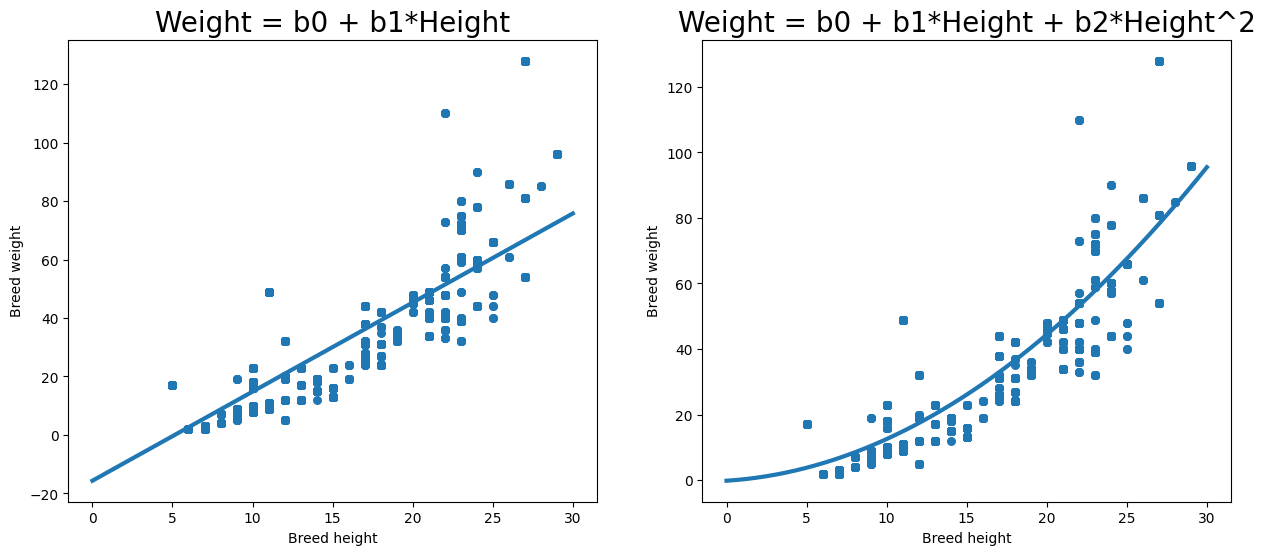

In [14]:
# set up the plotting space
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# estimate a simple linear regression model: predict min_weight from min_height
linear_model = sm.OLS(data['min_weight'], sm.add_constant(data['min_height']), missing='drop')

# get the regression coefficients (intercept and slope)
a, b = linear_model.fit().params

# plot the results in the left panel
axes[0].scatter(data['min_height'], data['min_weight'], s=30)
axes[0].plot([0, 30], [a, a + b*30], lw=3)
# y = a + b*xprint("Q:",a,b,c)
print("L:",a,b)
# Add labels and title
axes[0].set(ylabel="Breed weight", xlabel="Breed height")
axes[0].set_title("Weight = b0 + b1*Height", size=20)

# a + b*x + c*x^2
# now add height-squared to the model
quad_data = sm.add_constant(pd.DataFrame({'h':data['min_height'], 'h2':data['min_height']**2}))
quadratic_model = sm.OLS(data['min_weight'], quad_data, missing='drop')
a, b, c = quadratic_model.fit().params

# plot quadratic fit in the right panel
axes[1].scatter(data['min_height'], data['min_weight'], s=30)
X = np.linspace(0, 30)
axes[1].plot(X, [a + b*x + c*x**2 for x in X], lw=3)
print("Q:",a,b,c)
# Add labels and title
axes[1].set(ylabel="Breed weight", xlabel="Breed height")
axes[1].set_title("Weight = b0 + b1*Height + b2*Height^2", size=20);

## Getting _all_ the features
* Well, probably not all... but a _lot_
* How much information can we get out of the original dataset?
* From an interpretation-oriented standpoint, maybe not much more
* From a machine learning standpoint, we've just scratched the surface
* Some things we could add: names, colors, any number of interactions...
    * The cost of trying out silly things is much lower
    * Multicollinearity is not (much of) a concern

## Bag-of-words approach to handling fur color


<img src="https://miro.medium.com/max/1024/1*j3HUg18QwjDJTJwW9ja5-Q.png" style="margin-bottom: 10px;" width="500px">

* If you have a lot of data, it's not always worth thinking deeply about your features
* E.g., how should we model fur color?
    * "Black/Tricolor", "Calico Point", "Brown Brindle/Blue Cream"
* Simple approach: treat color descriptions like a [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model)
* Extract all word tokens (possibly even N-grams)

In [15]:
# How many colors in total?
print(data['color'].nunique())

534


In [16]:
# First 20 unique colors in the dataset
data['color'].unique()[:20]

array(['Yellow/White', 'Tricolor', 'Brown/White', 'Black/White',
       'Black/Gray', 'White/Black', 'Brown Tabby/White', 'Black/Tan',
       'Tan/Black', 'Black', 'Gold/Gold', 'Tortie Point', 'Sable/White',
       'Blue Merle/Tan', 'Blue Merle', 'Brown/Black', 'Black/Tricolor',
       'Gray/White', 'Black/Black', 'Tan'], dtype=object)

### Applying the bag-of-words model

In [17]:
# The CountVectorizer is an estimator that takes a series
# of documents (or strings) as input, and returns a count
# of every word token found in every document. There's also
# a TfidfVectorizer in cases where we want normalized frequency.
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# Initialize the CountVectorizer with default parameters.
# Some common arguments we might want to experiment with
# include min_df and max_df (which exclude words that are
# too frequent or infrequent), stop_words (which allows
# us to pass in a list of words to ignore), and ngram_range,
# which enables us to extract multi-word features.
vec = CountVectorizer()

# Extract all possible word features from the color list.
# Note that this returns a sparse matrix rather than a
# numpy array or a pandas DataFrame. A sparse matrix is
# a way of representing potentially very large 2-d arrays
# very efficiently, because we don't need to allocate
# memory for every cell in the array, only those that
# have a non-zero value.
fur_features = vec.fit_transform(data['color'])
print("fur_features is an object of type:", type(fur_features))

# After fitting, the names of the features (i.e., the
# columns of the sparse matrix returned by fit_transform())
# are stored in the estimator itself.
feature_names = vec.get_feature_names()

# Store in a pandas DF for easier manipulation later.
# Note that we convert the sparse array back to a dense
# one before loading into pandas. If our dataset were
# much bigger, we'd probably want to avoid this step
# and just keep working with the sparse matrix.
fur_features = pd.DataFrame(fur_features.todense(), columns=feature_names)

fur_features is an object of type: <class 'scipy.sparse._csr.csr_matrix'>


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
# Let's take a look...
fur_features.head()
# We went from 534 unique color combinations to 37 binary color features

In [ ]:
# How many instances of each color?
fur_features.sum(axis=0).sort_values(ascending=False)

### Adding interaction terms
* We could dummy-code all our categorical variables and then take pairwise products
* But if we don't need interpretabilty, there's a simpler hack
    * Concatenate all variables for which we want interactions
        * E.g., `breed='Alsatian'` and `sex='F'` becomes `Alsatian_F`
    * Dummy-code the result
    * A lightweight version of the ["hashing trick"](https://en.wikipedia.org/wiki/Feature_hashing)
* Let's cross sex (2 categories), sterilization (2 categories), and breed (1787 categories)
    * Could result in up to $2 \times 2 \times 1787 = 7148$ new features! But since many of these combinations of categories likely contain 0 pets, it'll probably be fewer than that

In [ ]:
# Simply concatenate the columns we want--making sure to convert any numeric
# columns to string, otherwise the concatenation will fail.
data['ssb'] = data['sex'].astype(str) + '_' \
    + data['sterilized'].astype(str) + '_' + data['breed']

# How many unique levels?
num_levels = data['ssb'].nunique()
print("Total number of unique values: {}".format(num_levels))

In [ ]:
# Now we can dummy-code the result
pd.get_dummies(data['ssb']).head(10)

### What else?
* Very easy to quickly build up thousands of derivative features in this way
* Doesn't mean we shouldn't think deeply about good features
    * Often, biggest jumps in performance are achieved by adding entirely new features (e.g., external dog breed data)
* Point is try to eke out every bit of signal from what we have

# Feature selection/reduction
* Not all features are created equal
* Just because we created 4,000+ features doesn't mean we need to include them all
* Two general approaches:
    1. Dimensionality reduction (extract latent signal from observed features)
        * Principal component analysis (PCA)
        * Independent component analysis (ICA)
        * etc.
    2. Feature selection (filter out features based on some criterion)
        * Keep high-variance features
        * Keep best-scoring features (i.e., strongest correlation with outcome)
        * Fit a preliminary estimator like lasso that drops some features
        * etc.
* Supported by the `decomposition` and `feature_selection` modules in `sklearn`

### Principal Component Analysis (PCA): The big idea
* For $P$ variables, we can plot the observations as a scatter plot in $P$-dimensional space
    * E.g., for $P=2$ features, we have a two-dimensional scatter plot with two axes, the X-axis and the Y-axis
* In PCA, we *rotate* the dataset in $P$-dimensional space to a *new* set of $P$ axes, called *principal components*, such that
    1. The observations are uncorrelated along the principal component axes
    2. The principal components are sorted in descending order of variance accounted for

In [ ]:
# Standardize the two features. It's usually 
# a good idea to do this prior to running PCA
df = data[['min_height', 'min_weight']].dropna()
df = (df - df.mean()) / df.std()

# compute the PCA using scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

# set up the plotting space
fig, axes = plt.subplots(1, 2, figsize=(14,7))

# data points in original, unrotated features space
axes[0].scatter(df['min_height'], df['min_weight'], s=30)
axes[0].set_xlabel("Breed height")
axes[0].set_ylabel("Breed weight")
axes[0].set_ylim([-2, 3.5])
axes[0].set_xlim([-2, 3.5])
a, b = (0, pca.components_[0,1]/pca.components_[0,0])
axes[0].plot([-1.8, 2.4], [a + b*-1.8, a + b*2.4], lw=3)
a, b = (0, pca.components_[1,1]/pca.components_[1,0])
axes[0].plot([-.9, .9], [a + b*-.9, a + b*.9], lw=3)

# data points in rotated principal component (PC) space
rotated = pca.transform(df)
axes[1].scatter(-rotated[:,0], rotated[:,1], s=30)
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_ylim([-2.5, 4])
axes[1].set_xlim([-2.5, 4])
axes[1].plot([-2.7, 3.5], [0, 0], lw=3)
axes[1].plot([0, 0], [-1.3, 1.3], lw=3);

# How much of the total variance is explained by each PC?
msg = "The first principal component alone explains {:.0%} of the total variance."
print(msg.format(pca.explained_variance_ratio_[0 ]))

* It's clear that the first principal component contains most of the useful information that was shared between Height and Weight
* So if we simply drop the second principal component, we've effectively reduced our two features down to one feature with minimal information loss

### Now let's do PCA on our array of over 4000 features
* PCA on such a large array would be very computationally demanding and take a long time
* So we'll do a faster, approximate version of PCA called *Randomized PCA*

In [ ]:
# First we need to recode our string column as a set of dummies
interaction_dummies = pd.get_dummies(data['ssb'])

# Let's concatenate this with the color features
# axis=1 indicates that we want to concatenate along
# the column axis (axis=0 would append each dataframe
# below the last.
lotsa_features = pd.concat([fur_features, interaction_dummies], axis=1)

# Like most other things in sklearn, decomposition classes
# implement the estimator interface. So they have fit() and
# predict() methods. Transformers also have a transform()
# method. First, we initialize the PCA transformer.
# We'll use a "randomized PCA" solver that is a speedier
# approximation of standard the principal component analysis
# (PCA) factorization. We need to specify the number of
# components we want at initialization. We'll take the first 100.
from sklearn.decomposition import PCA
rpca = PCA(100, svd_solver='randomized')

In [ ]:
# Now we can fit and transform in one step
rpca_features = rpca.fit_transform(lotsa_features)

# How much of the variance do these components explain?

# set up the plotting space
fig, axes = plt.subplots(1, 2, figsize=(14,7))

# scree plot
axes[0].plot(rpca.explained_variance_ratio_, lw=3)
axes[0].set_title('Scree plot (% variance explained by each PC)', size=20)
axes[0].set_xlabel('Principal Component number')
axes[0].set_ylabel('% of total variance')

# cumulative variance explained
axes[1].plot(np.cumsum(rpca.explained_variance_ratio_), lw=3)
axes[1].set_title('Cumulative variance explained', size=20)
axes[1].set_xlabel('Principal Component number')
axes[1].set_ylabel('% of total variance');

# Estimation
* With features in hand, we can now fit some models!
* scikit-learn has a bewildering array of models
* We'll talk about model selection shortly
* First we'll look at one model/algorithm in detail: **K-nearest neighbors (KNN)**
    * Easy to understand
    * Often competitive with more complicated models
    * Example of an algorithm really only used in machine learning context (no *data model*)

## K-nearest neighbors (KNN) algorithm
<img src="https://miro.medium.com/max/800/1*2zYNhLc522h0zftD1zDh2g.png" style="margin-bottom: 10px;">

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# Since we'll be predicting outcomes, let's restrict
# to only common ones. It's hard to predict something
# we don't have very many training examples of.
data = data.groupby('outcome').filter(lambda x: len(x) >= 500)

# Let's also do some data cleanup to make life easier
data = data.dropna(subset=['age'])
categoricals = ['sex', 'sterilized']
data[categoricals] = data[categoricals].fillna('Unknown')

# Important, otherwise we have problems later
# when we try to concatenate based on index
data = data.reset_index()
data.head()

In [ ]:
# Standardize the two features. It's usually 
# a good idea to do this prior to running PCA
df = data[['min_height', 'min_weight']].dropna()
df = (df - df.mean()) / df.std()

# compute the PCA using scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

In [ ]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [ ]:
# some data pre-processing
df = data[['min_height','min_weight']]
df = (df - df.mean()) / df.std()                # standardize before applying PCA.
df['size'] = np.dot(df, pca.components_.T)[:,0] # add PC1 as 'size'.
df['outcome'] = data['outcome']                 # append outcome in string form
encoder = LabelEncoder()                        # Initialize encoder for label conversion
df['y'] = encoder.fit_transform(data['outcome'])# and integer form.
df['age'] = data['age']                         # add the age predictor.
df = df.dropna()                                # drop missing values.
df = df.loc[df['outcome'] != 'Died',]           # drop 'Died' outcome (too few cases, 0.4%)
for v in ['age','size']:                        # standardize the predictors. KNN falters
    df[v] = (df[v] - df[v].mean())/df[v].std()  # if predictors on wildly different scales.

In [ ]:
# Define outcome colors
colors = ['red', 'green', 'blue', 'yellow']

In [ ]:
# define function to compute KNN for a given K and plot the result
def knn_plot(k, ax):
    knn = neighbors.KNeighborsClassifier(k)     # load the KNN classifier
    knn.fit(df[['size','age']], df['y'])        # fit the KNN model
    predicted = knn.predict(df[['size','age']]) # retrieve the outcomes predicted by KNN
    acc = accuracy_score(df['y'], predicted)    # compute accuracy of those predictions
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    h = .05  # step size in the mesh
    x_min, x_max = df['size'].min() - 0.2, df['size'].max() + 0.2
    y_min, y_max = df['age'].min() - 0.2, df['age'].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Create color maps from the lists
    cmap = ListedColormap(colors)
    # Lighter colors for the decision boundary
    cmap_light = ListedColormap(['pink', 'lightgreen', 'lightblue', 'lightyellow'])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points--with some jittering added so we can
    # see points a bit more clearly
    n_obs = len(df['size'])
    x_pt = df['size'] + np.random.normal(0, 0.05, n_obs)
    y_pt = df['age'] + np.random.normal(0, 0.05, n_obs)
    scattr = ax.scatter(x_pt, y_pt, c=df['y'], cmap=cmap, s=8)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Breed size (standardized)', fontsize=14)
    ax.set_ylabel('Dog age (standardized)', fontsize=14)
    ax.set_title('K = {}; Accuracy = {:.1%}'.format(k, acc), size=20)

# Set our values of k
k_values = [2, 100, 2000]
n_k = len(k_values)

# set up the plotting space
fig, axes = plt.subplots(1, n_k, figsize=(14, 14/n_k))

# fit the models and make the plots
for k, ax in zip(k_values, axes):
    knn_plot(k, ax)
    
# Plot a custom legend
patches = [mpatches.Patch(color=colors[i], label=encoder.classes_[i]) for i in range(4)]
plt.legend(handles=patches, bbox_to_anchor=(1.03, 1.03), loc=2, fontsize=14);

#### Is this good?
* Seems good, no?
* There are 4 classes, so chance should be 25%, right?
* Or should it...

In [ ]:
# Show the relative class frequencies
counts = df['outcome'].value_counts()
counts/counts.sum()

## We can (probably) do better
* Let's use some of that giant mess of features we extracted!
* Also, the analysis above only used the dogs (which are about half the dataset), so let's use the full dataset
* Finally, it's really easy to plug in other classifiers, so let's try some of those

In [ ]:
# For models with categoricals, we can call on
# patsy to dummy-code our variables, like we did
# when working with statsmodels
from patsy import dmatrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Some other estimators we can try (there are many more!)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC                      # support vector classifier
from sklearn.naive_bayes import BernoulliNB      # Naive Bayes for dummy predictors
from sklearn.linear_model import RidgeClassifier # ridge regression + classification rule

In [ ]:
fur_features[:10]

In [ ]:
interaction_dummies[:10]

In [ ]:
interaction_dummies = pd.get_dummies(data['ssb'])

# Let's concatenate this with the color features
# axis=1 indicates that we want to concatenate along
# the column axis (axis=0 would append each dataframe
# below the last.
lotsa_features = pd.concat([fur_features, interaction_dummies], axis=1)

# Like most other things in sklearn, decomposition classes
# implement the estimator interface. So they have fit() and
# predict() methods. Transformers also have a transform()
# method. First, we initialize the PCA transformer.
# We'll use a "randomized PCA" solver that is a speedier
# approximation of standard the principal component analysis
# (PCA) factorization. We need to specify the number of
# components we want at initialization. We'll take the first 100.


# Now we can fit and transform in one step
rpca_features = rpca.fit_transform(lotsa_features)

In [ ]:
5

In [ ]:
# plug in estimator of choice (just using default arguments)
# est = neighbors.KNeighborsClassifier() # default K = 5
est = RandomForestClassifier()#
#est = DecisionTreeClassifier()
#est = SVC()
#est = BernoulliNB()
# est = RidgeClassifier()

# grab the outcome and encode it as integer rather than string
encoder = LabelEncoder()
y = encoder.fit_transform(data['outcome'])

# Set up the features, starting with 'age'
X = data['age']
X = np.c_[X.values, rpca_features[:,:20]]
# X = np.c_[X.values, lotsa_features]
for i in range(X.shape[1]): # standardize all predictors
    X[:,i] = (X[:,i] - X[:,i].mean())/X[:,i].std()

# fit the model/algorithm
est.fit(X, y)
y_predicted = est.predict(X)

# We're assessing accuracy *in the training set* so be skeptical!
accuracy_score(y, y_predicted)

# Evaluation
* Evaluating model performance is rarely straightforward
* There are many criteria we might value
* Simple answers can be misleading
* Let's take a look at _how_ we classified different outcomes

### Confusion matrix
* How does the classifier go wrong?

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(y, y_predicted):
    ''' take true and predicted scores and plot confusion matrix '''
    # Get the confusion matrix
    cm = confusion_matrix(y, y_predicted)

    # Normalize the confusion matrix by dividing each row by its sum
    ncm = cm / cm.sum(axis=1)[:, np.newaxis]

    # Put into DataFrame and get all labels from the encoder
    class_labels = encoder.classes_
    ncm = pd.DataFrame(ncm, index=class_labels, columns=class_labels)

    # Rows are true classes, columns are assigned classes
    sns.heatmap(data=ncm, fmt='.2f', annot=True, cmap='Blues')

In [ ]:
plt.figure(figsize=(8,7))
plot_confusion_matrix(y, y_predicted)
plt.gca().set_title('Confusion matrix\nRow = reality, Column = decision', size=20);

In [ ]:
# The classification report shows us performance for
# the most common metrics, by class
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, y_predicted))
print('Precision: Of all cases predicted to be X, how many really were X?')
print('Recall: Of all cases that really are X, how many were correctly predicted to be X?\n')

# which integer goes with which outcome?
# a cross-tab is a simple way to find out
print(pd.crosstab(data['outcome'], y))

## Cross-validation
* Hopefully performance now looks reasonable
* But there's still a potential problem: overfitting
* We're training and evaluating on the same dataset--this is a big no-no!
* scikit-learn provides easy ways to evaluate models out-of-sample
    * This is known as cross-validation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [ ]:
# Import KFold cross-validation
from sklearn.cross_validation import KFold

In [ ]:
for train, test in folds:
    print(len(train),len(test))

In [ ]:
# Placeholder for scores from each fold
scores = []

# Create k folds (in our case 5). Loop over the folds,
# and for each one, split the dataset into training and test.
# In each fold, we train the data on the training values,
# and then evaluate its performance on the test. Finally,
# we can take the average of the out-of-sample scores as
# our estimate of model performance.
folds = KFold(n=len(X), n_folds=5, shuffle=True)
print("Indices of training/test samples in each fold:")
for train, test in folds:
    print(train, test) # so we can see what's going on
    est.fit(X[train], y[train])
    pred_y = est.predict(X[test])
    fold_score = accuracy_score(y[test], pred_y)
    scores.append(fold_score)

In [ ]:
# Overfitting be gone!
print("\nAccuracy in each fold:")
print(np.array(scores))

# Model selection
* We've experimented a lot with estimators, decomposition, evaluation, etc.
* This is only the tip of the iceberg...
* scikit-learn has hundreds of estimators!
* Two problems:
    1. How are we supposed to choose?
    2. How do we do this in a principled way?
* Basically we can try different things and see what leads to the highest cross-validation error
* Caveat: *ALL* of the steps in our analysis pipeline...
    * ...all data pre-processing strategies we try...
    * ...all models we try...
    * ...all hyperparameters (e.g., K parameter in KNN) we try for each model...
* ...should ideally occur within another cross-validation loop, an idea called *nested cross-validation*

# Fully automated pipelines
* We've done feature extraction, reduction, and selection; estimation; evaluation...
* But we can automate this
    * Both for efficiency, and to prevent overfitting (greatly facilitates nested cross-validation)
* sklearn.pipeline provides functionality for creating [fully automated Pipelines](http://scikit-learn.org/stable/modules/pipeline.html)
* We'll build a toy example with 2 steps, but we could chain our entire workflow

In [ ]:
# Import the Pipeline class
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [ ]:
# Initialize a list to store all the steps in our pipeline
steps = []

# Add feature selection
selector = SelectKBest(k=100)
steps.append(('select', selector))

# Add estimation
estimator = LogisticRegression()
steps.append(('estimate', estimator))

# set up the predictors
_X = np.c_[data['age'].values, lotsa_features]
for i in range(_X.shape[1]): # standardize all predictors
    _X[:,i] = (_X[:,i] - _X[:,i].mean())/_X[:,i].std()

# Initialize and fit the pipeline
pipeline = Pipeline(steps)
_y_pred = pipeline.fit(_X, y)

In [ ]:
_y_pred

## Building our own estimator:
### The fit-predict interface
* scikit-learn is built around the estimator interface
* "An estimator is an object that fits a model based on some training data and is capable of inferring some properties on new data"
* Every estimator must implement fit() and predict() methods
* Makes it easy to extend scikit-learn with our own estimators

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
class MercurialClassifier(BaseEstimator, ClassifierMixin):
    """Picks a random class and assigns that label to all cases."""

    def fit(self, X, y):
        ''' Selects a random class from the available options '''
        classes = np.unique(y)
        self.selected_ = np.random.choice(classes)
        return self

    def predict(self, X):
        ''' Applies the selected class to everything '''
        return np.repeat(self.selected_, len(X))

## A very quick dip into deep learning
* What is deep learning?
    * A field of machine learning that focuses on developing and applying "deep" neural network models
* Why deep learning?
    * The architecture of DNNs is (loosely) modeled on biological neural networks--which are very powerful!
    * For many real-world tasks (image recognition, language translation, etc.), deep learning blows everything else out of the water
    * A highly technical field
    * But also a lot of trial-and-error
    * Progress is *extremely* rapid

### Deep learning in Python
* Python is arguably the premier language for deep learning
* Virtually all major frameworks (TensorFlow, Caffe, Torch, etc.) have Python bindings
* High-level libraries like `keras` make things even easier
* We don't have time to do the topic justice, so let's just see a quick example

#### Logistic regression with neural networks
* Neural networks are extremely powerful function approximators
* We can start by training a logistic regression model using a neural net architecture
* Then we can start adding complexity (e.g., hidden layers)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
X.shape[1]

In [ ]:
# Our y is currently a 1-D array of integers; for multiclass classification,
# keras's categorical_crossentropy loss expects a matrix of binary columns.
# We use keras's to_categorical utility (which does essentially the same)
# thing as pandas' get_dummies()) for the conversion.
y_binary = to_categorical(y)

# Set aside 20% of data as a hold-out test
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2)

n_classes = y_train.shape[1]

# # # Multinomial logistic regression
# model = Sequential([
#     Dense(n_classes, activation='softmax', input_dim=X.shape[1])
# ])

# Uncomment the next few lines for a deeper version of the model
# that contains a hidden layer
model = Sequential([
    Dense(50, activation='sigmoid', input_dim=X.shape[1]),
    Dense(n_classes, activation='softmax') ])

# Compile the model using a categorical cross-entry loss
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Shuffle the training data
perm = np.random.permutation(len(X_train))
X_train = X_train[perm]
y_train = y_train[perm]

In [ ]:
# Print a summary of the model
model.summary()

In [ ]:
# Fit the model!
model.fit(X_train, y_train, nb_epoch=100, validation_split=0.2)

### Visualizing our network
* Keras provides basic tools for visualizing the network

In [ ]:
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz
#!pip install pydot==1.2.3

Text version summary

In [ ]:
model.summary()

In [ ]:
import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
keras.utils.vis_utils.pydot = pyd
#Visualize Model
def visualize_model(model):
    return SVG(model_to_dot(model,dpi=65).create(prog='dot', format='svg'))

In [ ]:
#create your model
#then call the function on your model
visualize_model(model)

In [ ]:
SVG(model_to_dot(model, show_shapes=True,dpi=65).create(prog='dot', format='svg'))

### Going deeper...
* If we improved performance non-trivially just by adding one hidden layer, shouldn't we just keep adding more layers?
* In theory, perhaps, but in practice, probably not
* Why not?
    * Adding parameters makes the model harder to train, so we need more data
    * There's probably a fundamental limit to how predictable outcomes are given these data

### How did we do?
* We can evaluate the neural network's performance using the same tools we used before

In [ ]:
# Get predicted scores for the hold-out
y_pred = model.predict(X_test)

In [ ]:
# The predictions are still in binary column format, so we need
# to squash them back into a vector of integers of class IDs.
# We can do this just by taking the max value in each row.
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class[:10],y_pred_class[:10]

In [ ]:
accuracy = (y_test_class == y_pred_class).mean()
print("Raw accuracy: {:.3f}\n".format(accuracy))

In [ ]:
names = encoder.classes_
print("\nClassification report:\n")
print(classification_report(y_test_class, y_pred_class, target_names=names))

In [ ]:
print("\nConfusion matrix:")
plot_confusion_matrix(y_test_class, y_pred_class)

# Blockchain
I will try to explain this as easy as possible.

A few years ago blockchain technology was used in cryptocurrency. Nowadays, a variety of diverse areas are seeing the benefits of applying this technological approach to their needs.

<img src="https://comparic.xyz/uploads/2019/06/Single-block.png" style="margin-bottom: 10px;" width="500px">
<img src="https://skywirex.com/img/cryptocurrency/blockchain/blockchain-la-gi.png" style="margin-bottom: 10px;" width="500px">

### Bitcoin scenario
* John wishes to pay bitcoins to Alice.<br>
* John's transaction is made.<br>
* Transactions are combined into a new block.<br>
* Blocks are broadcasted to miners.<br>
* Miners validates and accepts the transactions.<br>
* New block is encrypted with hash of last block.<br>
* New block become a part of blockchain.<br>
* Alice receives bitcoins.<br>

#### Problems in blockchain
* https://security.googleblog.com/2017/02/announcing-first-sha1-collision.html<br>
* https://www.schneier.com/blog/archives/2013/09/the_nsa_is_brea.html

#### Blockain is composed of 3 main elements:
* Data block<br>
* Signature<br>
* Hash<br>

In [ ]:
# Example of simple block class
class Block:
    hash_of_previous_block = None
    hash_of_this_block = None
    data = None
    timestamp = None

## Timestamp
We need to sign the block with date and time.

In [ ]:
from datetime import datetime

In [ ]:
# Returns a datetime object containing the local date and time
dateTimeObj = datetime.now()

We can directly print this datetime object, it will display the data in readable format i.e.

In [ ]:
print(dateTimeObj)

## Hash function

A cryptographic hash function takes an arbitrary block of data and calculates a fixed-size bit string (a digest), such that different data results (with a high probability) in different digests.

<img src="https://www.tutorialspoint.com/cryptography/images/hash_functions.jpg" style="margin-bottom: 10px;" width="500px">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Hash_function.svg/1200px-Hash_function.svg.png" style="margin-bottom: 10px;" width="500px">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Cryptographic_Hash_Function.svg/1200px-Cryptographic_Hash_Function.svg.png" style="margin-bottom: 10px;" width="500px">

In [ ]:
import hashlib
m = hashlib.md5()
m.update(b"Python")
m.update(b"Secirity")
m.digest()

Lets make our own simple hash function.

In [ ]:
def hash_function(msg):
    sum = 0
    for x in msg:
        print("Current sum:",sum," Char:",x," Code:",ord(x))
        sum = ( sum + ord(x) )%10
    return sum

In [ ]:
msg = "abc"

In [ ]:
hash_sum = hash_function(msg)

In [ ]:
print("Message:",msg," hash sum:",hash_sum)

## MD5 hash of a file

Files in internet are often signed by MD5 hash. You you download a file and check MD5 sum you know that the file is not corrupted.

In [ ]:
x = open("sol.py")

In [ ]:
content = x.read()
content[:10]

In [ ]:
bytes(content[:10], 'utf-8')

In [ ]:
file_hash = hashlib.md5()
file_hash.update(bytes(content, 'utf-8'))

In [ ]:
file_hash.digest()

In [ ]:
file_hash.hexdigest()

## MD5 of the class

### JSON serialization

Json is good for serialization of simple objects.

In [ ]:
import json

In [ ]:
pi = 3.14

In [ ]:
json.dumps(pi)

In [ ]:
json.dumps(str(dateTimeObj))

### Pickle serialization
For the more advanced structures we can use pickle

In [ ]:
import pickle

In [ ]:
data_block = Block()

In [ ]:
data_block

#### Pickle serialized code

In [ ]:
p = pickle.dumps(data_block)
p

#### MD5 hash of pickle
Hash of a serialized string.

In [ ]:
class_hash = hashlib.md5()
class_hash.update(p)
class_hash.digest()

## SHA
SHA is a family of the cryptography hash functions.

In [ ]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes

In [ ]:
digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
digest.update(b"Python")
digest.update(b"Secirity")
digest.finalize()

In [ ]:
import hashlib

This module implements a common interface to many different secure hash and message digest algorithms. Included are the FIPS secure hash algorithms SHA1, SHA224, SHA256, SHA384, and SHA512 (defined in FIPS 180-2) as well as RSA’s MD5 algorithm (defined in Internet RFC 1321). The terms “secure hash” and “message digest” are interchangeable. Older algorithms were called message digests. The modern term is secure hash.

In [ ]:
m = hashlib.sha256()
m.name

In [ ]:
m.update(b"Python")
m.update(b"Secirity")
m.digest() # string should be the same

In [ ]:
# The size of the resulting hash in bytes.
m.digest_size

In [ ]:
# The internal block size of the hash algorithm in bytes.
m.block_size

In [ ]:
# Like digest() except the digest is returned as a string object of double length, 
# containing only hexadecimal digits. This may be used to exchange the value safely 
# in email or other non-binary environments.
m.hexdigest()

# Signature

## RSA

In [ ]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa

In [ ]:
private_key = rsa.generate_private_key(
     public_exponent=65537, # prime number
     key_size=2048, # key size
     backend=default_backend()
)

In [ ]:
private_key

In [ ]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding

In [ ]:
message = b"A message I want to sign"

In [ ]:
signature = private_key.sign(
     message,
     padding.PSS(
         mgf=padding.MGF1(hashes.SHA256()),
         salt_length=padding.PSS.MAX_LENGTH
     ),
     hashes.SHA256()
)

In [ ]:
signature

If your data is too large to be passed in a single call, you can hash it separately and pass that value using Prehashed.

In [ ]:
from cryptography.hazmat.primitives.asymmetric import utils

In [ ]:
chosen_hash = hashes.SHA256()
hasher = hashes.Hash(chosen_hash, default_backend())
hasher.update(b"data & ")
hasher.update(b"more data")
digest = hasher.finalize()

In [ ]:
sig = private_key.sign(
     digest,
     padding.PSS(
         mgf=padding.MGF1(hashes.SHA256()),
         salt_length=padding.PSS.MAX_LENGTH
     ),
     utils.Prehashed(chosen_hash)
)

In [ ]:
sig

## Verify the signature

In [ ]:
public_key = private_key.public_key()

### Verify the message
If the verification goes wrong <b>InvalidSignature</b> is rised.

In [ ]:
public_key.verify(
     signature,
     b"message", # this will rise en error
     #massge, # this is ok
     padding.PSS(
         mgf=padding.MGF1(hashes.SHA256()),
         salt_length=padding.PSS.MAX_LENGTH
     ),
     hashes.SHA256()
)

### Verify the hash

In [ ]:
chosen_hash = hashes.SHA256()
hasher = hashes.Hash(chosen_hash, default_backend())
hasher.update(b"data & ")
hasher.update(b"more data")
digest = hasher.finalize()

In [ ]:
public_key.verify(
     sig,
     digest,
     padding.PSS(
         mgf=padding.MGF1(hashes.SHA256()),
         salt_length=padding.PSS.MAX_LENGTH
     ),
     utils.Prehashed(chosen_hash)
)